In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
import twitter
ACCESS_TOKEN='2357086238-MwyYLRbSedFu2M0Njp54QUXzKfMKKI2WARmFjfo'
ACCESS_SECRET='Oe5gWXCB9kRBhaSbzmNElmMn0cvW1pwBPwYGzIMF8YgDG'
CONSUMER_KEY = '2oJitj4MHCdDQ2LFzNFB3I79I'
CONSUMER_SECRET = 'wDVc56WZvJniH0so70IovIUYy9lPnkFPtmiLMp9iUfmiv8uBfV'


In [3]:
from twitter import *
t = Twitter(auth=OAuth(ACCESS_TOKEN, ACCESS_SECRET, CONSUMER_KEY, CONSUMER_SECRET), retry=True)
results = t.statuses.home_timeline()
for tweet in results:
    print(tweet['text'])

RT @MuslimJustice: Boston Action Alert: TOMORROW Thur 6/4 at 10am @BOSCityCouncil  hearing on $2.7m of grants to BPD on top of $414m budget…
Becoming AWS Certified in Big Data Specialty in 2 Months by @yitaekhwang https://t.co/M4qbfFl3aw
RT @IAF__FAI: Most of the #8cantwait demands are already present in many police forces that still kill, beat, harass, and intimidate Black…
RT @AnnaAkana: TRUMPS LARGEST DONORS. Boycott these businesses, vote with your dollar https://t.co/PUg7C7b73P
RT @GianoGionni: All 50 states plus 18 countries participated in #BlackLivesMatter protests as of today making it the largest civil rights…
Peaceful protestors chanting George Floyd on the Boston Common this afternoon. 

video @davidwade 

https://t.co/1KLhZVpWlQ
RT @justinkcomer: showing a cop my "i voted" sticker while he smacks me in the head with a stick
RT @chasingstaars: Here's a thread of youtube videos you can stream to donate to blm associations:
RT @MelaninMvskoke: If you actually believe BLM, the

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
import collections
from wordcloud import WordCloud

In [4]:
!python ./GetOldTweets3-0.0.10/GetOldTweets3.py --querysearch "george floyd" --lang en --maxtweets 1000
!mv output_got.csv floyd.csv

Saved 1000
Done. Output file generated "output_got.csv".


In [36]:
df = pd.read_csv("floyd.csv")
pd.set_option('display.max_colwidth', -1)
df.tail()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
995,2020-06-03 20:45:26,jcpllc1,NaN,0,0,0,#IfChauvinWereBlack It’d Be First Degree Murder And He Would Have Been Arrested While Knee In Neck #IfFloydWereWhite #JUNKTERRORBILLNOW #AmericaOrTrump #GeorgeFloydProtests #GeorgeFloyd #RacismInAmerica #BlackLivesMatter,NaN,NaN,#IfChauvinWereBlack #IfFloydWereWhite #JUNKTERRORBILLNOW #AmericaOrTrump #GeorgeFloydProtests #GeorgeFloyd #RacismInAmerica #BlackLivesMatter,1268282670724849669,https://twitter.com/jcpllc1/status/1268282670724849669
996,2020-06-03 20:45:26,wjz,NaN,0,0,3,"The National Guard was spotted along the Hollywood Walk of Fame in Los Angeles, California on Tuesday. The Guard has been deployed in California following protests and unrest after the death of George Floyd . https:// cbsloc.al/3eNq8ZP pic.twitter.com/GbNueXjMU4",NaN,NaN,NaN,1268282670561341440,https://twitter.com/wjz/status/1268282670561341440
997,2020-06-03 20:45:26,pupthedemon,BDSixsmith,0,0,1,"if george floyd had been polish-american, he'd be alive today. https:// twitter.com/BDSixsmith/sta tus/1268028914351460352 …",NaN,NaN,NaN,1268282669605019648,https://twitter.com/pupthedemon/status/1268282669605019648
998,2020-06-03 20:45:26,hypervocal,NaN,0,0,0,"Emmanuel Sanders: George Floyd ""could have easily been me"" - ProFootballTalk https:// bit.ly/3gP5kms pic.twitter.com/4auszLLu9i",NaN,NaN,NaN,1268282669353373697,https://twitter.com/hypervocal/status/1268282669353373697
999,2020-06-03 20:45:26,kaya2915,NaN,0,0,0,"In the words of George Floyd ’s lawyer, Mr. Crump,this afternoon, “The WORLD is watching! The WORLD is watching! The WORLD is watching! The WORLD is watching! The WORLD is watching! The WORLD is watching! The WORLD is watching! “ https://www. nytimes.com/2020/06/03/us/ protests-pope-francis-obama-justin-trudeau-george-bush.html?smid=fb-nytimes&smtyp=cur …",NaN,NaN,NaN,1268282669315522561,https://twitter.com/kaya2915/status/1268282669315522561


In [37]:
import nltk
import re
stopwords = nltk.corpus.stopwords.words("english")

# Clean tweets for sentiment analysis
def get_clean_words(words):
    def _isnum(w):
        try:
            int(w)
            return True
        except ValueError:
            return False
        
    # Remove URLs
    words = re.sub("(\w+:\/\/\S+)", " ", ' '.join(words)).split()
    
    # Remove subsequences of URL
    words = [w for w in words if w.find("twittercom") == -1 and w.find("instagramcom") == -1 
             and w.find("igshid") == -1 and w.find("atus") == -1]

    words = [w for w in words if w != "RT" and w != "via"]

    # Remove punctuation
    words = [w.replace('(', '') for w in words]
    words = [w.replace(')', '') for w in words]
    words = [w.replace('?', '') for w in words]
    words = [w.replace(',', '') for w in words]
    words = [w.replace('.', '') for w in words]
    words = [w.replace('"', '') for w in words]
    words = [w.replace('!', '') for w in words]
    words = [w.replace(':', '') for w in words]
    words = [w.replace('&amp;', '') for w in words]
    words = [w.replace('/', '') for w in words]
    words = [w.replace('[', '') for w in words]
    words = [w.replace(']', '') for w in words]
    
    #Remove URL
    
    # Remove numbers
    words = [w for w in words if not _isnum(w)]
    
    # Remove links
    words = [w for w in words if 'http' not in w]
        
    # Remove hashtags
    words = [w for w in words if not w.startswith("#")]
    
    # Remove mentions
    words = [w for w in words if not w.startswith("@")]
    
    # Set words to lowercase and remove them if they are stop words
    words = [w.lower() for w in words if w.lower() not in stopwords]
        
    
    # Only keep words with more than one character
    words = [w for w in words if len(w) > 1]    
    w = " ".join(words)
    return w

In [38]:
# Funtion to pass each tweet into the clean words function and create a new list
def clean_tweets(df):
    new_text = []
    for i in range(len(df)):
        new_text.append(get_clean_words(df['text'].values[i].split()))
    df.text = new_text

In [39]:
clean_tweets(df)

In [40]:
df.head()

,date,username,to,replies,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,2020-06-03 20:48:17,rachelmmalinsky,WxBrenn,0,0,0,justice fighting,NaN,NaN,#GeorgeFloyd #RacismInAmerica,1268283387288190977,https://twitter.com/rachelmmalinsky/status/1268283387288190977
1,2020-06-03 20:48:17,BaronianConsult,NaN,0,0,0,va leaders call changes criminal justice system following george floyd 's death amsncom01en-usbb14z e3hocid=st2,NaN,NaN,NaN,1268283386059259911,https://twitter.com/BaronianConsult/status/1268283386059259911
2,2020-06-03 20:48:17,DrRicoShort,NaN,0,0,0,oklet soak still confused instagramcompca_kxt0jwz3,NaN,NaN,#blacklivesmatter #georgefloyd,1268283385597825026,https://twitter.com/DrRicoShort/status/1268283385597825026
3,2020-06-03 20:48:16,DAI46304679,NaN,0,0,0,i'm reading john boyega tells george floyd protesters i’m speaking heart metro app metronewsapp2033751,NaN,NaN,NaN,1268283383509114880,https://twitter.com/DAI46304679/status/1268283383509114880
4,2020-06-03 20:48:16,LiveTopnews,NaN,0,0,0,four ex-police officers involved death george floyd charged topnewstodaylive20200603fou r-ex-police-officers-involved-in-the-death-of-george-floyd-charged,NaN,NaN,NaN,1268283382716301312,https://twitter.com/LiveTopnews/status/1268283382716301312


justice fighting va leaders call changes criminal justice system following george floyd 's death amsncom01en-usbb14z e3hocid=st2 oklet soak still confused instagramcompca_kxt0jwz3 i'm reading john boy


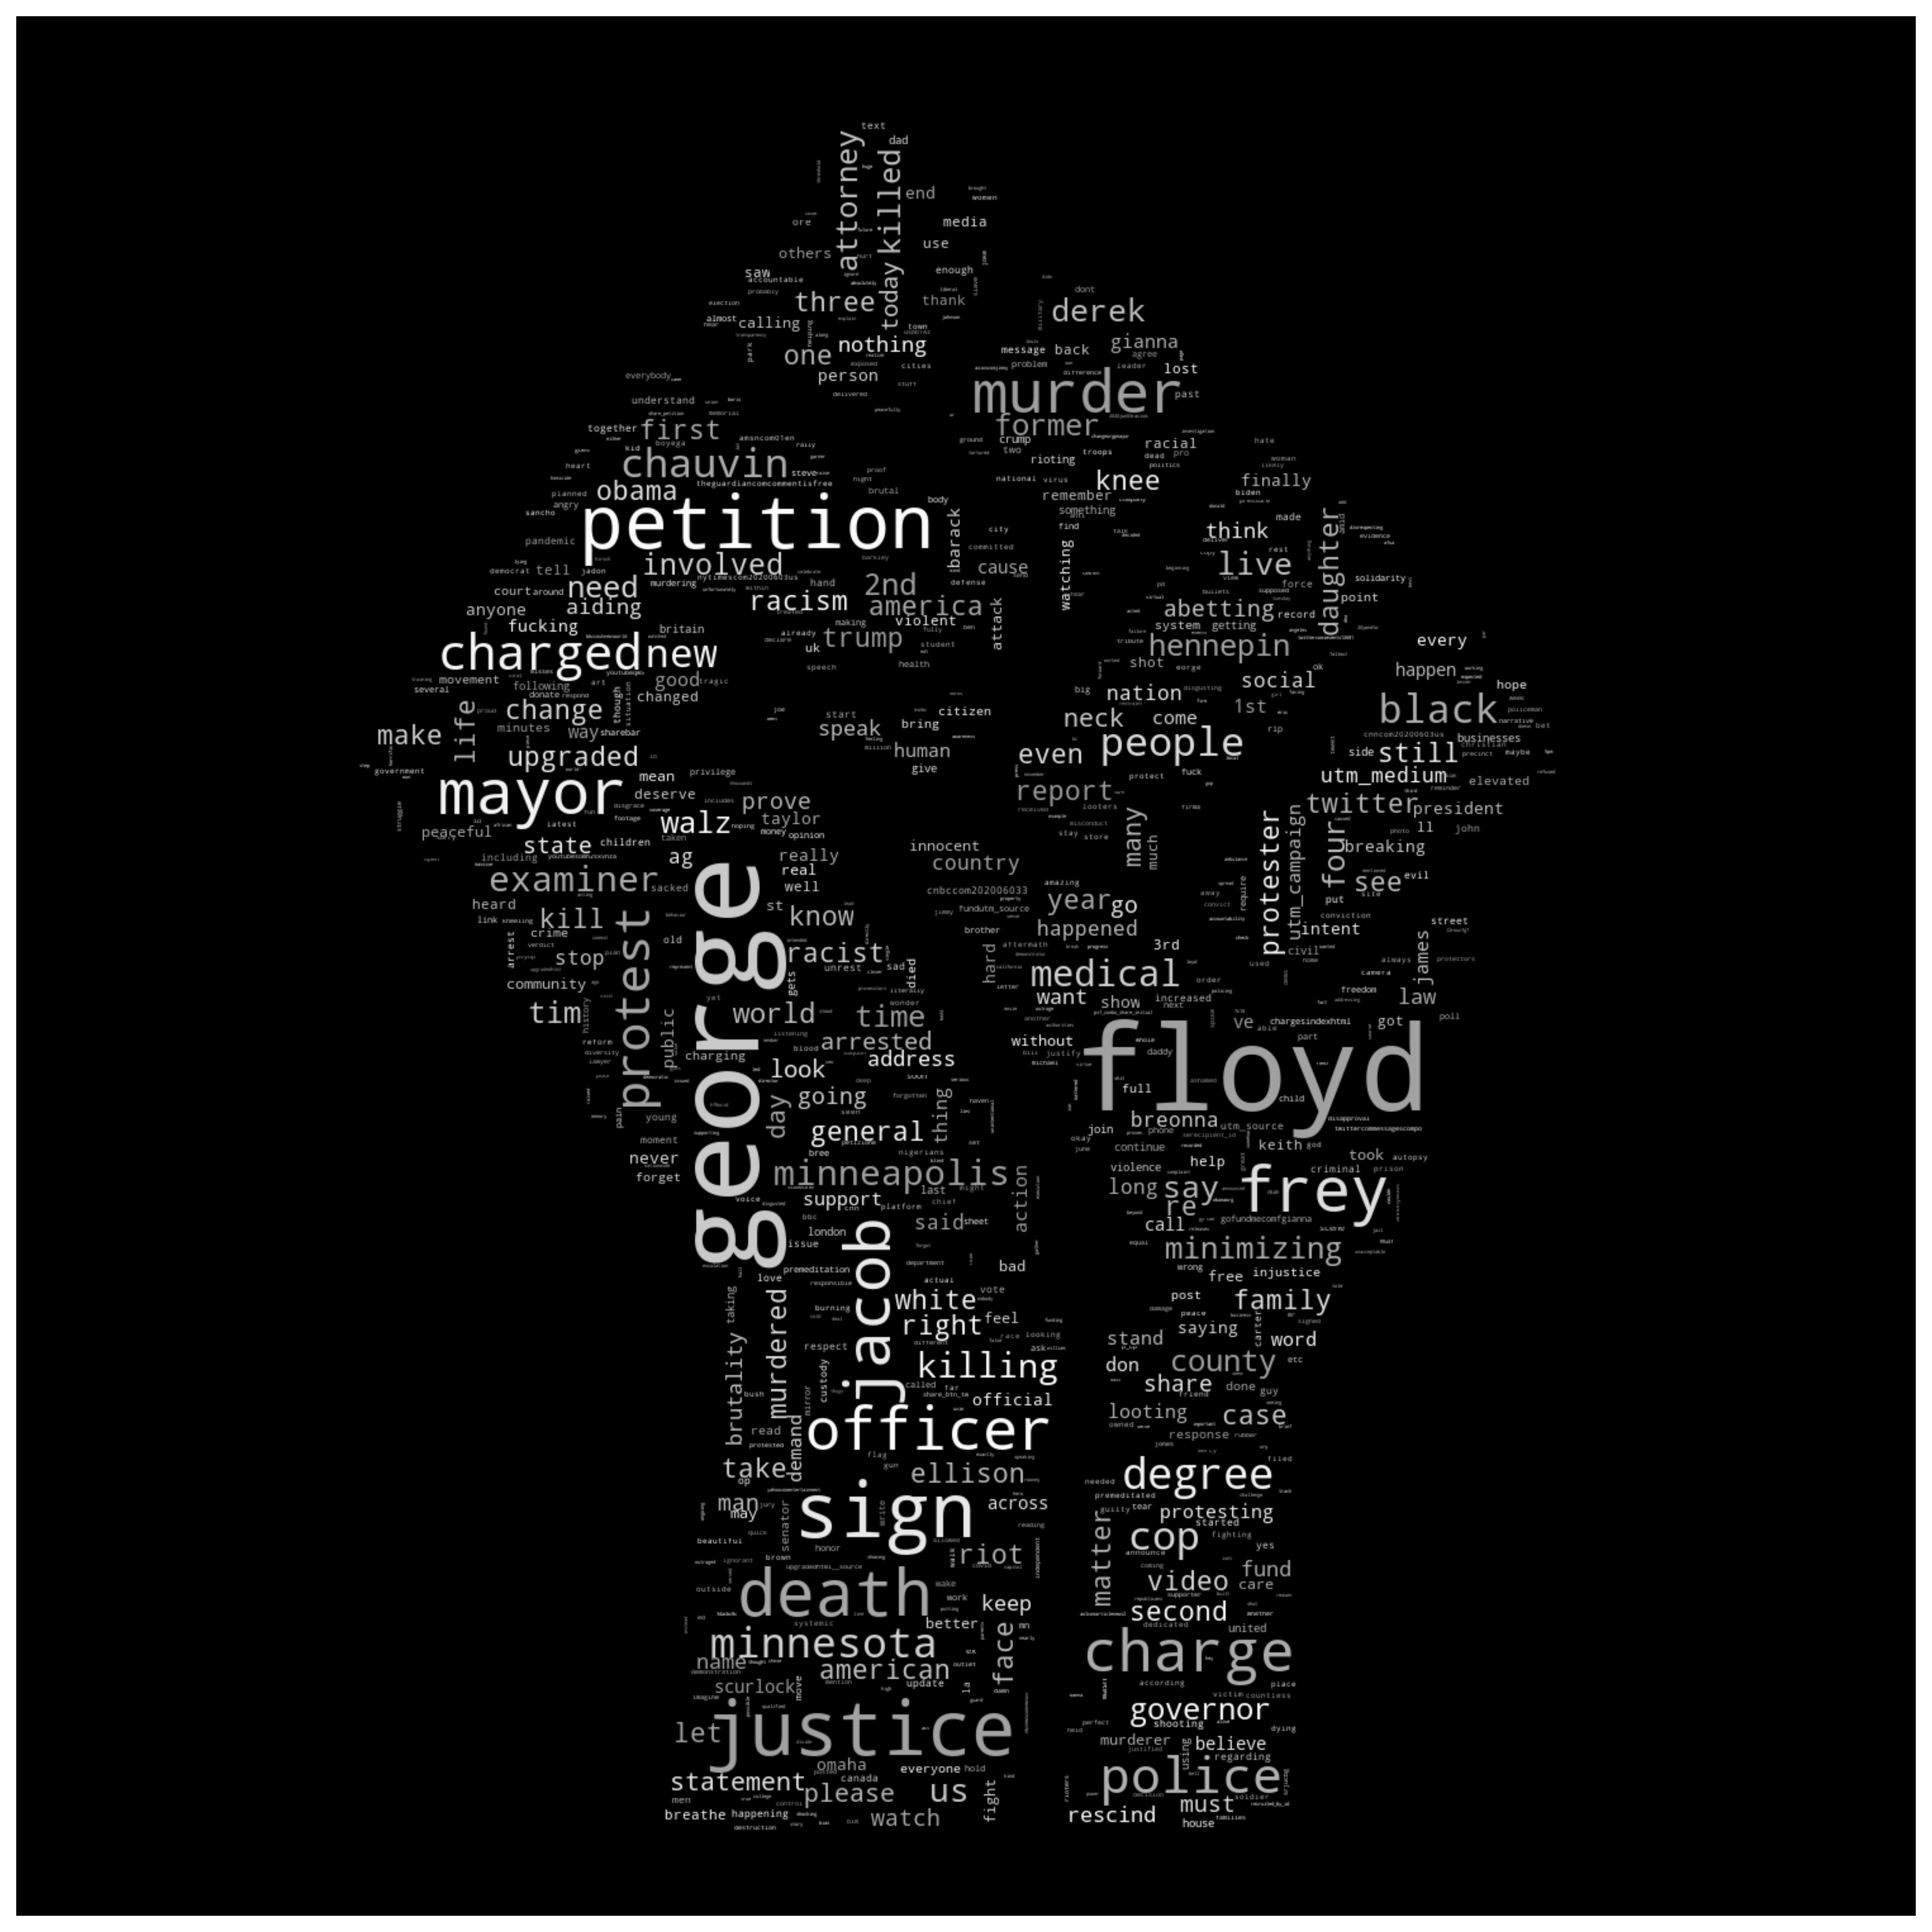

In [43]:

import wordcloud
import matplotlib.pylab as plt
from PIL import Image
import random

def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

char_mask = np.array(Image.open("blm.jpg"))    
image_colors = wordcloud.ImageColorGenerator(char_mask)
fig = plt.figure(figsize=(12, 18), dpi=300)
text = ' '.join(list(df.text))
print(text[:200])
wc = wordcloud.WordCloud(background_color="black", max_words=10000, width=400, height=400, mask=char_mask, collocations=False, random_state=42)
wc.generate(text)
plt.imshow(wc.recolor(color_func=grey_color_func), interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.show()

## 